In [1]:
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(777)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(745)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
tf.random.set_seed(1234455)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, Activation
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [3]:
dataset = pd.read_csv(r'df_prova.csv', parse_dates = ['Data'])

dataset = dataset['PUN'].values

dataset

Training_set = dataset[:26112]
Test_set = dataset[26112:]

Training_set = Training_set.reshape(-1, 1)

In [4]:
sc = MinMaxScaler(feature_range=(0,1))

In [5]:
training_set_scaled = sc.fit_transform(Training_set)

In [6]:
X_train = []
y_train = []
for i in range(24,26112):
    X_train.append(training_set_scaled[i-24:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [7]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=150, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.1))
# Second GRU layer
regressorGRU.add(GRU(units=150, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.1))
# Third GRU layer
regressorGRU.add(GRU(units=150, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.1))
# Fourth GRU layer
regressorGRU.add(GRU(units=150, activation='tanh'))
regressorGRU.add(Dropout(0.1))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=50)

Epoch 1/50
26088/26088 [==============================] - 45s 2ms/step - loss: 0.0040
Epoch 2/50
26088/26088 [==============================] - 43s 2ms/step - loss: 0.0015
Epoch 3/50
26088/26088 [==============================] - 44s 2ms/step - loss: 0.0013: 0s - lo
Epoch 4/50
26088/26088 [==============================] - 44s 2ms/step - loss: 0.0012
Epoch 5/50
26088/26088 [==============================] - 44s 2ms/step - loss: 0.0011
Epoch 6/50
26088/26088 [==============================] - 44s 2ms/step - loss: 0.0010
Epoch 7/50
26088/26088 [==============================] - 44s 2ms/step - loss: 9.3727e-04
Epoch 8/50
26088/26088 [==============================] - 44s 2ms/step - loss: 9.1064e-04
Epoch 9/50
26088/26088 [==============================] - 44s 2ms/step - loss: 8.6245e-04
Epoch 10/50
26088/26088 [==============================] - 44s 2ms/step - loss: 8.2227e-04
Epoch 11/50
26088/26088 [==============================] - 44s 2ms/step - loss: 8.1400e-04
Epoch 12/50
26088/26088

In [8]:
d = pd.read_csv(r'df_prova.csv', parse_dates = ['Data'])
d = d['PUN']
inputs = d[len(d) - len(Test_set)-24:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [9]:
X_test = []
for i in range(24,192):
    X_test.append(inputs[i-24:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_test_price = regressorGRU.predict(X_test)
predicted_test_price = sc.inverse_transform(predicted_test_price)

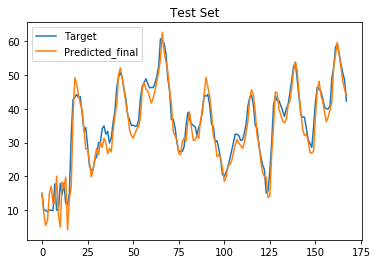

In [10]:
plt.plot(Test_set, label = 'Target')
plt.plot(predicted_test_price, label = 'Predicted_final')
plt.title('Test Set')
plt.legend()
plt.savefig('testGRU_2.png')

In [11]:
print('MAE: ', np.round(mean_absolute_error(Test_set, predicted_test_price), 3))
print('RMSE: ', np.round(math.sqrt(mean_squared_error(Test_set, predicted_test_price)), 3))
print('MAPE: ', np.round(math.sqrt(mean_absolute_percentage_error(Test_set, predicted_test_price)), 3))

MAE:  2.702
RMSE:  3.507
MAPE:  7.064


In [12]:
inputs = d[:len(Training_set)+24].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [13]:
X_train = []
for i in range(24,26136):
    X_train.append(inputs[i-24:i,0])
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], 24 ,1))
predicted_train_price = regressorGRU.predict(X_train)
predicted_train_price = sc.inverse_transform(predicted_train_price)

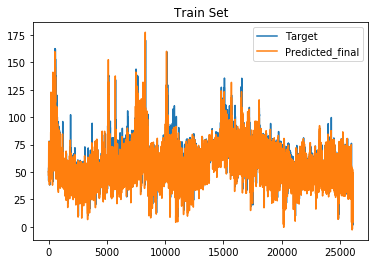

In [14]:
plt.plot(Training_set, label = "Target")
plt.plot(predicted_train_price, label = "Predicted_final")
plt.title('Train Set')
plt.legend()
plt.savefig('TrainGRU_2.png')

In [15]:
print('MAE: ', np.round(mean_absolute_error(Training_set, predicted_train_price),3))
print('RMSE: ', np.round(math.sqrt(mean_squared_error(Training_set, predicted_train_price)), 3))
print('MAPE: ', np.round(math.sqrt(mean_absolute_percentage_error(Training_set, predicted_train_price)), 3))

MAE:  6.635
RMSE:  9.637
MAPE:  3.58
